# Sliding Window (Variable Size)

Have 2 pointers, left `L` and right `R` that form a window, and increment either pointers based on some conditions
- This window can vary in size
- We can keep expanding our window as long as we don't break the constraint we are given
- Usually we also have some target (length/sum etc)

Psuedocode:
```python
#increment R at every step
for R in range(len(array)):
    if constraint broken:
        remove last element/make the subarray satisfy constraint again
    check whether we have done better at the target
```


---

## Simple Problem: Length of Longest Subarray

> Q: Find the length of the longest subarray, with the same value in each position.
> 
> e.g. `[4,2,2,3,3,3]` will give a length of 3


In [ ]:
def longestSubarray(nums):
    length = 0
    L = 0

    # make R increment 1 by 1, make the right pointer move at every iteration'
    # initially, L=R so on the first loop length will be updated to 1
    for R in range(len(nums)):
        # check if the new elem to be added is same or different
        if nums[L] != nums[R]:
            # if different, then collapse the subarray
            L = R
        # check if this new valid subarray is longer than previous max
        length = max(length, R - L + 1)
    return length

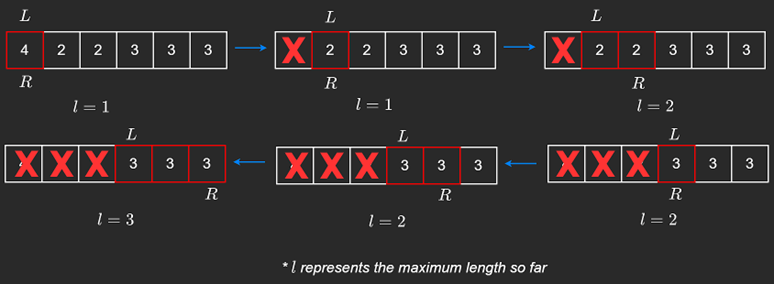

Make use of 2 pointers, left `L` and right `R`.

Constraint:
- Cannot have distinct values in our window (all must have same values)

Goal:
- Keep track of longest window that meets this constraint

Concept
- We make `R` iterate over the whole array by running a for loop over the array
- At each step, if we encounter a different value, then we know this is an invalid window and constraint is broken
  -  then we collapse the array by moving `L` to the position of `R` 
  - we do this because every value from `L` to `R` is the same value so just move `L` straight to `R`
- Make sure after every movement of either `L` or `R` we check if the new array length exceeds the previous max length

---


## Classic Problem: Minimum Length Subarray with constraint on Sum

> Q: Find the minimum length subarray, where the sum is greater than or equal to the threshold. Assume all values are positive.

Constraint:
- Greater than or equal to threshold

Goal:
- Keep track of shortest window that meets this constraints

Concept:
- Again iterate `R` over entire array
- Upon addition of new elems from `R`, if constraint is broken then remove last elem by incrementing `L` one step

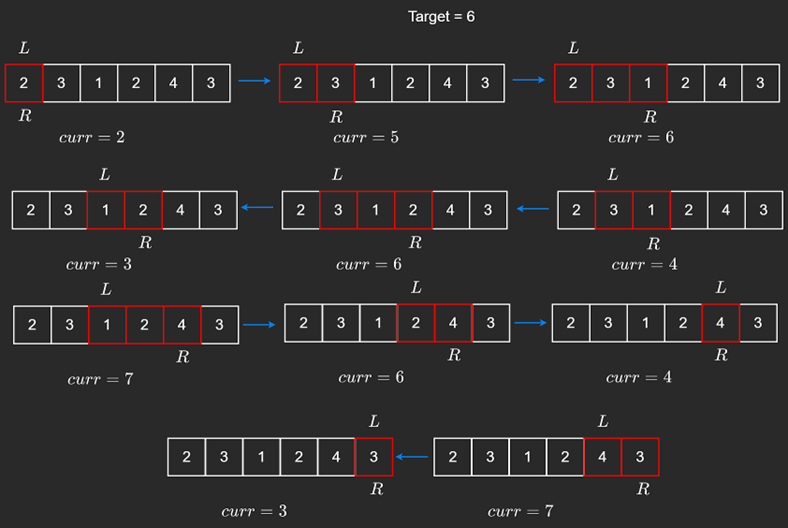

In [ ]:
def shortestSubarray(nums, threshold):
    L, total = 0, 0
    length = float("inf")

    # the outer loop is for exploration/adding elems
    for R in range(len(nums)):
        # update sum
        total += nums[R]

        # check if it satisfies constraint
        while total >= threshold:
            # constraint is satisfied but we want the min length
            # so we have to decrease L

            # check if weve done better at target
            length = min(R - L + 1, length)
            total -= nums[L]
            L += 1
    # if length is still float("inf"), means it was never updated, no suitable arrays found
    return 0 if length == float("inf") else length




## Time Complexity

You may see nested loops and think it should be $O(n^2)$. However think about it carefully again, both `L` and `R` can only go forward and cannot reset. Hence the worst case is when `L` and `R` both go through the entire array, where we will do `n` operations coming from `L`, and `n` operations from `R` making it $O(n)$.

### *Why is Sliding Window more efficient than brute force search which is $O(n^2)$ ?*

### Brute Force Search

To check all subarrays, one method is for each value of R, check all possible values of L so

```
R=0
while R havent reach end:
    L=0
    while L havent reach R:
        increment L by 1
        check if we got a better objective
    increment R by 1
```

### Sliding Window

Usually it goes like:
```
while R haven't reach the end:
    if not valid:
        increment L until valid
    
    check if we got a better objective
    increment R by 1
```

The key intuition is for a given value of `L` and `R`, if this subarray is already suboptimal, then any smaller value of `L` is also suboptimal - we only need to search values of `L` greater than the current one - we eliminate alot of search space here. A better objective must come from increasining `L`. It is with this crucial property that we dont have to search through each possible value of `L`, for a given `R`. We then keep on increasining `L` until some constraint is violated

---

## Problem: Longest Distinct Substring

Given a string s, find the length of the longest substring without duplicate characters.

In [ ]:
# my solution quite slow


def lengthOfLongestSubstring(s: str) -> int:
    L = 0
    longlen = 0

    for R in range(len(s)):
        # after adding new elem, keep decreasing from back until no duplicates
        while len(set(s[L : R + 1])) != len(s[L : R + 1]):
            L += 1

        # else continue

        # check against goal
        if R - L + 1 > longlen:
            longlen = R - L + 1

    return longlen

*why my solution is slower:*
- in each iteration of the inner while loop, Im creating a new set `set(s[L:R+1])` which is $O(n)$
- Im doing multiple substring slicing which is $O(k)$ where k is the length of substring

> in Python, `s[L]` is $O(1)$ and doesnt create new memory. just references an existing character
> 
> However `s[L:R]` creates a whole new object and allocates new memory, copying the original string over. This is $O(k)$ where k is substring length

- the fast method maintains a single set throughout the process
- add/remove individual characters instead of creating substrings
- avoids many set creation and length comparisons

In [ ]:
# neetcode much faster


def lengthOfLongestSubstring(s: str) -> int:
    """this method
    guarantees that before adding the new elem, the previous window is ALL DISTINCT
    make use of this property to just remove the first elem of window"""
    charSet = set()
    l = 0
    res = 0

    for r in range(len(s)):
        # as long as new elem has a duplicate, we keep shrinking the window until we remove the duplicate
        while s[r] in charSet:
            # keep removing the first elem in this subarray by iterating l
            # until no duplicates
            charSet.remove(s[l])
            l += 1
        charSet.add(s[r])
        res = max(res, r - l + 1)
    return res


---

## Problem: Longest Repeating Substring With Replacement

You are given a string `s` consisting of only uppercase english characters and an integer `k`. You can choose up to `k` characters of the string and replace them with *any* other uppercase English character.

After performing at most `k` replacements, return the length of the longest substring which contains only one distinct character.

e.g. `ABAB` will give 4 because I can either replace all the As with Bs or all the Bs with As

In [ ]:
# I think this is very similar to longest repeating substring but this time allow for 2 wild cards - this can take any letter
def characterReplacement(s: str, k: int) -> int:
    """
    same alg as repeating substring but allow for k wildcards
    start R from the first wildcard when need to restart array

    you dont actually have to replace the characters,
    can just treat them as wildcards

    as were only interested in the length
    """
    maxlen = 0
    # tracks window indices
    L, R = 0, 0
    # tracks the position of the first wildcard used/first distinct
    first_wild = 0
    # this tracks how many wildcards weve used
    wild_count = k

    # if R reaches right before the last node
    while R < len(s):
        # check if the new elem to be added is same or different

        print("start of R is ", R)

        # if characters are the same
        if s[L] == s[R]:
            print(f"same, left is {L},{s[L]} and right is {R},{s[R]}")
            # continue with this window
            # update prev record if neccessary
            maxlen = max(maxlen, R - L + 1)
            print("maxlen", maxlen)

        # characters are different
        else:
            # check if wildcards exist:
            if k > 0:
                # check if still have wildcards left I can use
                if wild_count > 0:
                    print(f"use wildcard, left is {L},{s[L]} and right is {R},{s[R]}")
                    # check if the first wildcard
                    if wild_count == k:
                        # remember this position
                        first_wild = R
                    # use wildcard
                    wild_count -= 1

                    # update prev record if neccessary
                    maxlen = max(maxlen, R - L + 1)
                    print("maxlen", maxlen)

                # no wildcards left and need to reset
                else:
                    print(
                        f"no wildcard left and reset, left is {L},{s[L]} and right is {R},{s[R]}"
                    )
                    wild_count = k
                    # reset L and R regardless
                    L = first_wild
                    R = first_wild

            # wildcards dont exist
            else:
                # collapse the array
                L = R

        # increment R regardless for the next loop
        R += 1
    return maxlen

In [ ]:
# this method pass like half the test cases but are weak when the subarray first elem needs replacement like this:
print(characterReplacement("ABBB", 2))
# expected answer is 4

start of R is  0
same, left is 0,A and right is 0,A
maxlen 1
start of R is  1
use wildcard, left is 0,A and right is 1,B
maxlen 2
start of R is  2
use wildcard, left is 0,A and right is 2,B
maxlen 3
start of R is  3
no wildcard left and reset, left is 0,A and right is 3,B
start of R is  2
same, left is 1,B and right is 2,B
maxlen 3
start of R is  3
same, left is 1,B and right is 3,B
maxlen 3
3


**Neetcode solution**

- We always replace the less frequent character
- We do this by matching all characters in a subarray to take on values of the most common character

How do we know an array is a valid array/possible to match all the characs to take on most common charac?
- Build a hashmap of character counts
- If  `WindowLen - Count[Most Frequent Character]`<=k (n.o. wildcards), then this subarray is valid

From here, we basically use a sliding window,
- Check if array is valid
  - if valid, increment `R` by 1
  - if invalid,
    - increment `L` by 1, keep going until the array is valid again

the `maxf` is a mindfuck and i still dont really get it, but it stores the highest number in the count hashmap ever recorded.

$$
Length = R - L + 1 > maxfreq + k
$$

if our goal was to maximise $Length$, and previously we found $maxfreq_0$, we are only interested in subarrays where $maxfreq_{new}>maxfreq_0$ hence we only bother updating for higher $maxfreq$

In [ ]:
# neetcode solution with maxf- this is O(n)
def characterReplacement(s: str, k: int) -> int:
    count = {}

    l = 0
    # this stores the count of the most common character that ever appeared in the hash map
    maxf = 0
    for r in range(len(s)):
        # this line increments the count of this new charac by 1. if not in dict, then make the count 0
        count[s[r]] = 1 + count.get(s[r], 0)
        # maxf is the count of the most frequent character
        # ONLY UPDATE maxf if the new count exceeds it
        maxf = max(maxf, count[s[r]])

        # if len(subarray)-maxf>n.o. wildcards
        if (r - l + 1) - maxf > k:
            # since we removed this charac from our window, need to decrement it from out window
            count[s[l]] -= 1
            l += 1

    return r - l + 1


In [ ]:
# neetcode without maxf - this is O(26*n) since we need to search through the hashmap to find the most common charac

# neetcode solution with maxf- this is O(n)
def characterReplacement(s: str, k: int) -> int:
    # this counts what is inside our sliding window
    count = {}
    objective = 0

    l = 0
    # this stores the count of the most common character that ever appeared in the hash map
    maxf = 0
    for r in range(len(s)):
        # this line increments the count of this new charac by 1. if not in dict, then make the count 0
        count[s[r]] = 1 + count.get(s[r], 0)
        # maxf is the count of the most frequent character
        maxf = max(count.values())

        # if len(subarray)-maxf>n.o. wildcards
        if (r - l + 1) - maxf > k:
            # since we removed this charac from our window, need to decrement it from out window
            count[s[l]] -= 1
            # this order is very important! only increment L at the last part of the code, if not we run into bugs
            l += 1
        objective = max(objective, r - l + 1)

    return objective
